In [1]:
import networkx as nx

In [17]:
import random
def startingGraph():
    F = nx.Graph()
    for i in range(0,98):
        nodes = range(i*22,i*22+22)
        H = nx.Graph()
        for n in nodes:
            H.add_node(n, team=i)
            for n1 in nodes:
                if( n > n1):
                    H.add_edge(n,n1)
        F = nx.compose(F,H)
    for i in range(0,2156):
        for j in range(50):
            if random.uniform(0,1) > .4:
                u = random.choice(range(0,2156))
                if u != i:
                    F.add_edge(i,u)
                    # print('random')
    return F        


In [ ]:
import random
for i in range(0,2156):
    for j in range(50):
            if random.uniform(0,1) > .3:
                u = random.choice(range(0,2156))
                if u != i:
                    F.add_edge(i,u)
                    print('random')

In [132]:
import random
from random import randrange
# random.uniform(0, 1)

def transfers(F):
    for n in F.nodes():
        if random.uniform(0,1) < .16:
            F.nodes[n]['team'] = 'left big 5'
            # print('retired!')
        elif random.uniform(0,1) < .45 and F.nodes[n]['team'] != 'left big 5':
            # print(F.nodes[n]['team'])
            ran = randrange(98)
            while(F.nodes[n]['team'] == ran):
                ran = randrange(98)
            teammates = [x for x in F.nodes() if F.nodes[x]['team'] == ran]
            F.nodes[n]['team'] = ran
            for t in teammates:
                if n != t:
                    F.add_edge(n,t)
            # print(F.nodes[n]['team'])
            # print('------------------')
    # nx.draw_networkx(F)


In [127]:
def newplayers(F, players):
     cplayers = F.number_of_nodes()
     for i in range(cplayers,cplayers+players):
         newteam = randrange(98)
        #  print(newteam)
         teammates = [x for x in F.nodes() if F.nodes[x]['team'] == newteam]
         while len(teammates) > 30:
             newteam = randrange(98)
             teammates = [x for x in F.nodes() if F.nodes[x]['team'] == newteam]
         F.add_node(i, team=newteam)
         for t in teammates:
              if i != t:
               F.add_edge(i,t)
         for j in range(50):
            if random.uniform(0,1) > .7:
                u = random.choice(range(0,cplayers))
                if u != i:
                    F.add_edge(i,u)
                    # print('random')
            
     # nx.draw_networkx(F)


In [136]:
def promodemo(F):
    cplayers = F.number_of_nodes()
    for i in range(10):
        team = randrange(60,98)
        # print(f'Team {team} relagated')
        teammates = [x for x in F.nodes() if F.nodes[x]['team'] == team]
        for n in teammates:
            F.nodes[n]['team'] = 'left big 5'
        for p in range(cplayers+22*i, cplayers+22*(i+1)):
            F.add_node(p,team=team)
            for p1 in range(cplayers+22*i, cplayers+22*(i+1)):
                if( p > p1):
                    F.add_edge(p,p1)
            for j in range(50):
                if random.uniform(0,1) > .8:
                    u = random.choice(range(0,cplayers))
                    if u != i:
                        F.add_edge(p,u)





In [138]:
numnodes = []
numedges = []
pathlen = []
cluster = []
degmin = []
degmax = []
degmean = []

import numpy as np
for j in range(100):
    print(j)
    F = startingGraph()
    for i in range(0,13):
        print(f'Season {i+1}')
        transfers(F)
        promodemo(F) #110 new players
        if(i == 5):
            newplayers(F, 364)
        else:
            newplayers(F, 360)
    numnodes.append(F.number_of_nodes())
    numedges.append(F.number_of_edges())
    pathlen.append(nx.average_shortest_path_length(F, weight=None))
    cluster.append(np.mean(list(nx.clustering(F).values())))
    degrees = [F.degree(n) for n in F.nodes()]
    degmin.append(min(degrees))
    degmax.append(max(degrees))
    sum = 0
    for i in degrees:
        sum += i
    degmean.append(sum / len(degrees))
    
    
    



0
Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Season 11
Season 12
Season 13
1
Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Season 11
Season 12
Season 13
2
Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Season 11
Season 12
Season 13
3
Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Season 11
Season 12
Season 13
4
Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Season 11
Season 12
Season 13
5
Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Season 11
Season 12
Season 13
6
Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Season 11
Season 12
Season 13
7
Season 1
Season 2
Season 3
Season 4
Season 5
Season 6
Season 7
Season 8
Season 9
Season 10
Season 11
Season 12
Season 13
8
Season 1
Seaso

In [ ]:
stats = [numnodes,
numedges,
cluster,
degmin,
degmax,
degmean]

labels = ['Number of nodes', 'Number of Edges', 'Clustering', 'Path Length' 
'Min Degree', 'Max Degree', 'Avg Degree']
i = 0
for s in stats:
    print(f'The mean for {labels[i]} is {np.mean(s)} and SD is {np.std(s)}')
    i+=1


In [104]:
F.number_of_nodes()

9696

In [130]:
F.number_of_edges()

530496

481
24
109.42574257425743
423
21
481
24
115.54969072164948


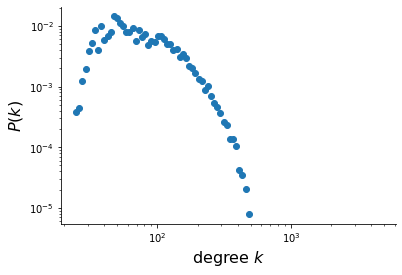

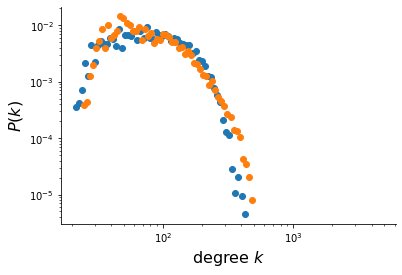

In [131]:
plot_degree_dist(F)
plot_double_dist(G,F)

In [10]:
# Function Defintions
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import deg
%matplotlib inline
import math
# Function Defintions
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    print(kmax)
    print(kmin)
    mybins = math.ceil(math.sqrt(G.number_of_nodes()))
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=mybins)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, mybins=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    sum = 0
    for i in degrees:
        sum += i
    mean = sum / len(degrees)
    print(mean)

In [ ]:
import pandas as pd
edges = pd.read_csv('edgesDataComp3.csv')
edges

In [30]:
edges.rename(columns={'Source' : "source", 'Target' : 'target'}, inplace=True)

In [31]:
G = nx.from_pandas_edgelist(edges, edge_attr=['Season', 'Name1', 'Name2'])

In [32]:
# Function Defintions
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import deg
%matplotlib inline
import math
# Function Defintions
def plot_double_dist(G, F):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    print(kmax)
    print(kmin)
    degreesF = [F.degree(n) for n in F.nodes()]
    kminf = min(degreesF)
    kmaxf = max(degreesF)
    print(kmaxf)
    print(kminf)
    mybins = math.ceil(math.sqrt(G.number_of_nodes()))
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=mybins)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, mybins=20)
    if kminf>0:
        bin_edgesf = np.logspace(np.log10(kminf), np.log10(kmaxf)+1, num=mybins)
    else:
        bin_edgesf = np.logspace(0, np.log10(kmaxf)+1, mybins=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)
    densityf, _ = np.histogram(degreesF, bins=bin_edgesf, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    log_bef = np.log10(bin_edgesf)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    xf = 10**((log_bef[1:] + log_bef[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.loglog(xf, densityf, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    sum = 0
    for i in degrees:
        sum += i
    mean = sum / len(degrees)
    print(mean)

423
21
438
23
115.54969072164948


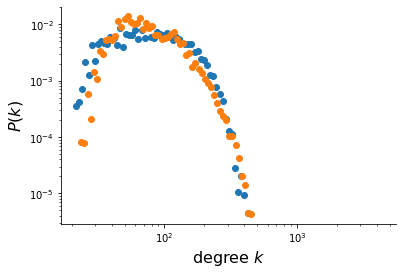

In [42]:
plot_double_dist(G,F)

In [98]:
print(np.mean(list(nx.clustering(G).values())),np.mean(list(nx.clustering(F).values())))
# print(nx.average_shortest_path_length(G,weight=None),nx.average_shortest_path_length(F,weight=None))

0.3482117834323844 0.2547972765792915


In [134]:
print(nx.average_shortest_path_length(F, weight=None))

2.420270690039607
